In [1]:
from pathlib import Path  # https://realpython.com/python-pathlib/
import pandas as pd

In [4]:
from models.bow_lr import create_count_vector, train_bow, format_df_to_bow

project_root = Path.cwd().parent
train_path = project_root.joinpath("dataset", "formatted_train.csv")
val_path = project_root.joinpath("dataset", "formatted_val.csv")

train_df = pd.read_csv(train_path).head(10000)
val_df = pd.read_csv(val_path).head(10000)

# Train model
cv = create_count_vector(train_df)
bow_lr_model = train_bow(train_df, cv)

# Get accuracy
x_train, y_train = format_df_to_bow(cv, train_df)
x_val, y_val = format_df_to_bow(cv, val_df)
print("Train accuracy: ", round(bow_lr_model.score(x_train, y_train), 3))
print("Validation Accuracy: ", round(bow_lr_model.score(x_val, y_val), 3))

Train accuracy:  0.993
Validation Accuracy:  0.811


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    )

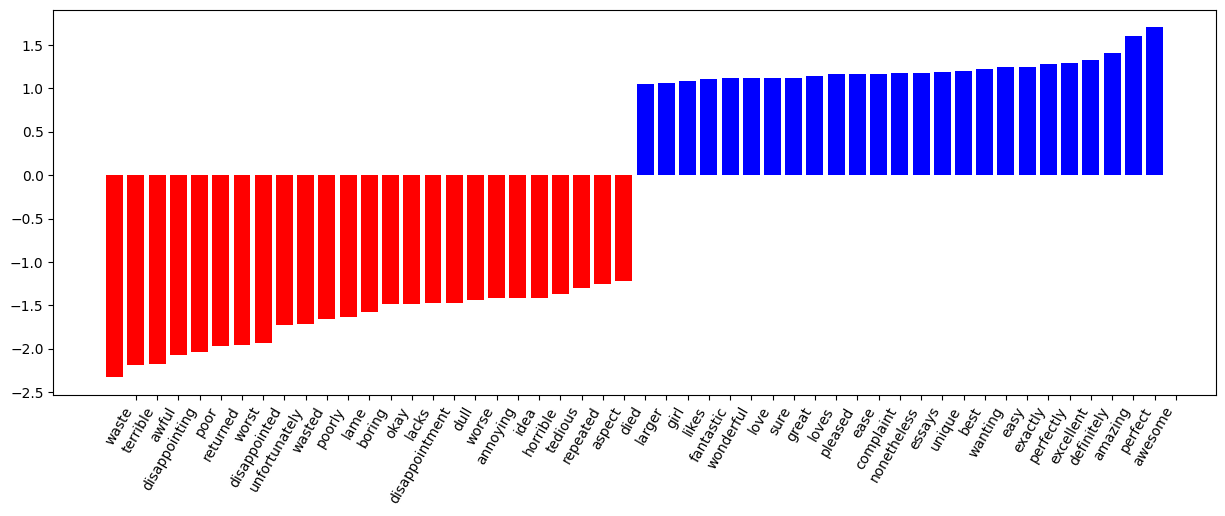

In [7]:
visualize_coefficients(bow_lr_model, cv.get_feature_names_out())